In [11]:
%matplotlib notebook

import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from IPython import display

In [34]:
n=10**5
pl=10**6
m=10**5
N=m*n

In [35]:
#plt.clf()
#plt.plot([-3,3],[0,0],'k')
#plt.axes().set_aspect('equal')

nhits=0

st=time.clock()
for i in range(m):
    #progress bar
    sys.stdout.flush()
    percent = float(i) / m
    hashes = '#' * int(round(percent * 20))
    spaces = ' ' * (20 - len(hashes))
    sys.stdout.write("\rPercent: [{0}] {1}%".format(hashes + spaces, int(round(percent * 100))))

    #if (i % (m/100) == 0):
    #    print i/(m/100),'%'

    thetas=np.random.random_sample(size=n)*180.
    Ds=np.random.random_sample(size=n)*0.5
    
    #for i in range(n/pl):
    #    r=np.random.normal(loc=0.,scale=0.5)
    #    x1=-np.cos(np.radians(thetas[i*pl]))+r
    #    x2=np.cos(np.radians(thetas[i*pl]))+r
    #    y1=np.sin(np.radians(thetas[i*pl]))+0.5
    #    y2=-np.sin(np.radians(thetas[i*pl]))+0.5
    #    plt.plot([x1,x2],[y1,y2])
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    
    hits=np.where(Ds<=0.5*np.sin(np.radians(thetas)))[0]
    nhits+=len(hits)

sys.stdout.flush()
et=time.clock()
pi=2.*N/nhits

print 'pi~=',pi
print 'calculated pi to ',np.abs((pi-np.pi)/np.pi)*100.,'%'
print 'calculation took ',(et-st),' seconds.'
print 'used 10^',np.log10(n*m),' trials.'

Percent: [####################] 100%pi~= 3.14160660665
calculated pi to  0.000444139541691 %
calculation took  452.0  seconds.
used 10^ 10.0  trials.


100
1000
pi~= 3.14099946603
calculated pi to  0.0188817464614 %
calculation took  515.43  seconds.
used 10^ 5.0  trials.

1000
1000
pi~= 3.14052597529
calculated pi to  0.0339534248093 %
calculation took  503.64  seconds.
used 10^ 6.0  trials.

10000
100
pi~= 3.14537613981
calculated pi to  0.120432106676 %
calculation took  21.68  seconds.
used 10^ 6.0  trials.

100000
10
pi~= 3.14252942193
calculated pi to  0.0298182624297 %
calculation took  1.84  seconds.
used 10^ 6.0  trials.

1000000
1
pi~= 3.14342834869
calculated pi to  0.0584319899758 %
calculation took  0.32  seconds.
used 10^ 6.0  trials.

10000000
100
pi~= 3.14160192299
calculated pi to  0.000295054160288 %
calculation took  99.72  seconds.
used 10^ 9.0  trials.

In [4]:
def calc(n,m):
    nhits=0

    st=time.clock()
    for i in range(m):
        thetas=np.random.random_sample(size=n)*180.
        Ds=np.random.random_sample(size=n)*0.5
    
        hits=np.where(Ds<=0.5*np.sin(np.radians(thetas)))[0]
        nhits+=len(hits)

    et=time.clock()
    pi=2.*N/nhits

    return (et-st)

In [17]:
ts=np.zeros((9,9))
x=np.arange(9)
xs,ys=np.meshgrid(x,x)
for i in range(1,9):
    for j in range(1,9):
        if i+j>8:
            ts[i,j]=NaN
        else:
            ts[i,j]=calc(10**i,10**j)

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   6.00000000e-02
    5.50000000e-01   5.54000000e+00   5.51400000e+01   5.52500000e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-02   1.00000000e-01
    9.40000000e-01   9.44000000e+00   9.45200000e+01  -1.00000000e+00]
 [  0.00000000e+00   1.00000000e-02   5.00000000e-02   4.80000000e-01
    4.77000000e+00   4.80000000e+01  -1.00000000e+00  -1.00000000e+00]
 [  1.00000000e-02   4.00000000e-02   4.20000000e-01   4.24000000e+00
    4.24400000e+01  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  4.00000000e-02   4.20000000e-01   4.16000000e+00   4.19900000e+01
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  4.50000000e-01   4.50000000e+00   4.52100000e+01  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  4.67000000e+00   4.66900000e+01  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  4.9590000

<IPython.core.display.Javascript object>


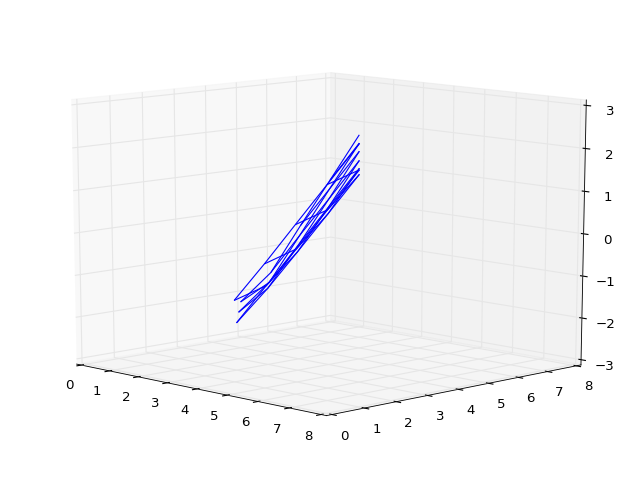

552.5 94.52 48.0 42.44 41.99 45.21 46.69 49.59


/home/sfactor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10
/home/sfactor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in log10


In [22]:
print ts[1:,1:]
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
#ax=fig.add_subplot(111, projection='3d')
ax.plot_wireframe(xs,ys,np.log10(ts))
print ts[1,8],ts[2,7],ts[3,6],ts[4,5],ts[5,4],ts[6,3],ts[7,2],ts[8,1]